In [1]:
from random import Random
import time

In [2]:
DEMO_WIDTH = 60

## Text Samples

In [3]:
text1 = """
No, when I go to sea, I go as a simple sailor, right before the mast,
plumb down into the forecastle, aloft there to the royal mast-head. True,
they rather order me about some, and make me jump from spar to spar, like
a grasshopper in a May meadow. And at first, this sort of thing is
unpleasant enough. It touches one's sense of honour, particularly if you
come of an old established family in the land, the Van Rensselaers, or
Randolphs, or Hardicanutes. And more than all, if just previous to putting
your hand into the tar-pot, you have been lording it as a country
schoolmaster, making the tallest boys stand in awe of you. The transition
is a keen one, I assure you, from a schoolmaster to a sailor, and requires
a strong decoction of Seneca and the Stoics to enable you to grin and bear
it. But even this wears off in time.
""".strip()

text2="""In olden times when wishing still helped one, there lived a king
whose daughters were all beautiful; and the youngest was
so beautiful that the sun itself, which has seen so much, was
astonished whenever it shone in her face. Close by the king’s castle
lay a great dark forest, and under an old lime-tree in the forest was
a well, and when the day was very warm, the king’s child went
out into the forest and sat down by the side of the cool fountain;
and when she was bored she took a golden ball, and threw it up
on high and caught it; and this ball was her favorite plaything. """.strip()

text3="""IT is not an exaggeration to say that the
persons and incidents portrayed in the
great literature of a people influence
national character no less potently than
the actual heroes and events enshrined in
its history. It may be claimed that the
former play an even more important part
in the formation of ideals, which give to
character its impulse of growth.
In the moving history of our land, from
time immemorial great minds have been
formed and nourished and touched to
heroic deeds by the Ramayana and the
Mahabharata. In most Indian homes,
children formerly learnt these immortal
stories as they learnt their mother tongue
at the mother's knee. And the sweetness
and sorrows of Sita and Draupadi, the
heroic fortitude of Rama and Arjuna and
the loving fidelity of Lakshmana and
Hanuman became the stuff of their young
philosophy of life.
The growing complexity of life has
changed the simple pattern of early home
life. Still, there are few in our land who do
not know the Ramayana and the
Mahabharata.""".strip()

text4=""" Houses and rooms are full of perfumes, the shelves are crowded with perfumes,
I breathe the fragrance myself and know it and like it,
The distillation would intoxicate me also, but I shall not let it.
The atmosphere is not a perfume, it has no taste of the distillation, it is odorless,
It is for my mouth forever, I am in love with it,
I will go to the bank by the wood and become undisguised and naked,
I am mad for it to be in contact with me.
The smoke of my own breath,
Echoes, ripples, buzz’d whispers, love-root, silk-thread, crotch and vine,
My respiration and inspiration, the beating of my heart, the passing of blood and air through my lungs,
The sniff of green leaves and dry leaves, and of the shore and dark-color’d sea-rocks, and of hay in the barn,
The sound of the belch’d words of my voice loos’d to the eddies of the wind,
A few light kisses, a few embraces, a reaching around of arms,
The play of shine and shade on the trees as the supple boughs wag,
The delight alone or in the rush of the streets, or along the fields and hill-sides,
The feeling of health, the full-noon trill, the song of me rising from bed and meeting the sun.
Stop this day and night with me and you shall possess the origin of all poems,
You shall possess the good of the earth and sun (there are millions of suns left).""".strip()

text5="""Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 
The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow). Seek immediate medical attention if you have serious symptoms.  Always call before visiting your doctor or health facility. 
People with mild symptoms who are otherwise healthy should manage their symptoms at home. 
On average it takes 5–6 days from when someone is infected with the virus for symptoms to show, however it can take up to 14 days.""".strip()

# Dynamic Programming

In [4]:
class DynamicProgramming(object):
    def __init__(self, width):
        self.width = width

    def TightPack(self, words):
        
        return ' '.join(words)

    def TextBadness(self, i, j):
        length = len(self.TightPack(self.words[i:j])) 
        if length > self.width:
            return float('inf')
        else:
            return (self.width - length) ** 3.0
    def expanded(self, words, width):
        if len(words) == 1:
            return words[0]
        Unspaced_words = ''.join(words)
        length = len(Unspaced_words)
        space_left = width - length
        gaps = [0 for _ in range(len(words) - 1)]
        while space_left:
            for idx, gap in enumerate(gaps):
                if not space_left:
                    break
                gaps[idx] += 1
                space_left -= 1
        Random(Unspaced_words).shuffle(gaps)
        gaps.append(0)  
        spaces = (gap * ' ' for gap in gaps)
        return ''.join(word + space for word, space in zip(words, spaces))

    def Best_Split(self, i, j):
        try:
            return self._message[(i, j)]
        except KeyError:
            pass
        if j == len(self.words):
            length = len(self.TightPack(self.words[i:j]))
            if length <= self.width:
                
                self._message[(i, j)] = 0
                self._impo[i] = j
                return 0
       
        vals = []
        for n in reversed(range(i, j)):
            total_TextBadness = self.TextBadness(i, n + 1) + self.Best_Split(n + 1, j)
            vals.append((total_TextBadness, n + 1))
       
        best_val, best_idx = min(vals, key=lambda pair: pair[0])
        self._message[(i, j)] = best_val
        self._impo[i] = best_idx
        return best_val

    def Combined_Lines(self):
        a = 0
        b = self._impo[0]
        while True:
            words = self.words[a:b]
            if b == len(self.words):
                # this is the last line, so
                # we don't justify the text
                yield self.TightPack(words)
                return
            yield self.expanded(words, self.width)
            a = b
            b = self._impo[a]
    def format(self, text):
        self._message = {}
        self._impo = {}
        self.words = text.split()
        self.Best_Split(0, len(self.words))
        return '\n'.join(self.Combined_Lines())

In [5]:
def main1():
    print(DynamicProgramming(DEMO_WIDTH).format(text1))
def main2():
    print(DynamicProgramming(DEMO_WIDTH).format(text2))
def main3():
    print(DynamicProgramming(DEMO_WIDTH).format(text3))
def main4():
    print(DynamicProgramming(DEMO_WIDTH).format(text4))
def main5():
    print(DynamicProgramming(DEMO_WIDTH).format(text5))

# Greedy Approach

In [6]:
class GreedyApproach(DynamicProgramming):
    def format(self, text):
        self._message = {}
        self._impo = {}
        self.words = text.split()
        self.lines = []
        Current_Line = []
        for word in self.words:
            tmp = Current_Line + [word]
            if len(self.TightPack(tmp)) <= self.width:
                Current_Line += [word]
            else:
                self.lines.append(Current_Line)
                Current_Line = [word]
        if Current_Line:
            self.lines.append(Current_Line)
        return '\n'.join(self.Combined_Lines())

    def Combined_Lines(self):
        last = len(self.lines) - 1
        for idx, words in enumerate(self.lines):
            if idx == last:
                yield self.TightPack(words)
                return
            yield self.expanded(words, self.width)

In [7]:
def greedy1():
    print(GreedyApproach(DEMO_WIDTH).format(text1))
def greedy2():
    print(GreedyApproach(DEMO_WIDTH).format(text2))
def greedy3():
    print(GreedyApproach(DEMO_WIDTH).format(text3))
def greedy4():
    print(GreedyApproach(DEMO_WIDTH).format(text4))
def greedy5():
    print(GreedyApproach(DEMO_WIDTH).format(text5))

### Calculating Time for Algorithm Based on Dynamic Programming

In [8]:
x1_d = time.perf_counter()
main1()
y1_d = time.perf_counter()
t1_d=y1_d-x1_d

No, when I go to  sea, I go as a simple sailor, right before
the  mast, plumb down into the  forecastle, aloft  there  to
the royal mast-head. True, they rather order me  about some,
and  make me jump from spar to spar, like a grasshopper in a
May meadow. And at  first, this sort  of thing is unpleasant
enough.  It  touches one's sense of honour,  particularly if
you come of  an  old established family in the land, the Van
Rensselaers, or  Randolphs, or  Hardicanutes. And more  than
all, if just previous to putting your hand into the tar-pot,
you have  been lording it as  a country schoolmaster, making
the  tallest boys  stand in awe of you. The transition is  a
keen one, I assure you, from  a schoolmaster  to  a  sailor,
and requires a strong decoction of Seneca and the  Stoics to
enable  you to grin and bear it. But even  this wears off in
time.


In [9]:
x2_d = time.perf_counter()
main2()
y2_d = time.perf_counter()
t2_d=y2_d-x2_d

In olden times when  wishing still helped one, there lived a
king whose  daughters  were all beautiful;  and the youngest
was  so  beautiful that the  sun  itself, which  has seen so
much,  was astonished  whenever  it shone in her face. Close
by the  king’s castle lay a great dark forest, and under  an
old lime-tree in the forest was a well, and when the day was
very warm,  the  king’s  child went out into the  forest and
sat down by the side of the cool fountain; and  when she was
bored she took a golden ball, and  threw  it up on  high and
caught it; and this ball was her favorite plaything.


In [10]:
x3_d = time.perf_counter()
main3()
y3_d = time.perf_counter()
t3_d=y3_d-x3_d

IT  is  not  an  exaggeration to  say  that  the persons and
incidents  portrayed  in the  great  literature  of a people
influence national  character  no  less  potently  than  the
actual heroes and events  enshrined  in  its history. It may
be claimed  that  the  former  play an  even  more important
part in the  formation of ideals,  which  give to  character
its  impulse  of growth. In the moving  history of our land,
from  time  immemorial  great  minds  have  been  formed and
nourished and touched to heroic deeds  by  the Ramayana  and
the Mahabharata.  In  most  Indian homes, children  formerly
learnt these  immortal stories  as  they learnt their mother
tongue at the  mother's knee. And the sweetness and  sorrows
of Sita  and  Draupadi,  the  heroic  fortitude  of Rama and
Arjuna and  the  loving  fidelity of  Lakshmana and  Hanuman
became  the stuff of  their young philosophy  of  life.  The
growing complexity of life has changed the simple pattern of
early home life. Still, 

In [11]:
x4_d = time.perf_counter()
main4()
y4_d = time.perf_counter()
t4_d=y4_d-x4_d

Houses and  rooms  are full  of  perfumes,  the  shelves are
crowded  with perfumes, I breathe  the fragrance myself  and
know  it  and  like  it,  The distillation would  intoxicate
me also,  but I shall  not let  it. The  atmosphere  is  not
a perfume,  it has  no  taste  of the  distillation,  it  is
odorless,  It is for my mouth forever, I am in love with it,
I  will go to the  bank  by  the wood and become undisguised
and  naked,  I am mad for it to  be in  contact with me. The
smoke of  my  own  breath, Echoes, ripples, buzz’d whispers,
love-root, silk-thread, crotch and vine, My respiration  and
inspiration,  the beating of  my heart, the passing of blood
and air  through my lungs, The sniff of green leaves and dry
leaves,  and of the shore and dark-color’d sea-rocks, and of
hay in the barn, The sound of  the belch’d words of my voice
loos’d to the eddies of  the wind, A few light kisses, a few
embraces,  a reaching around  of arms, The play of shine and
shade on  the trees  as 

In [12]:
x5_d = time.perf_counter()
main5()
y5_d = time.perf_counter()
t5_d=y5_d-x5_d

Coronavirus disease  (COVID-19)  is  an  infectious  disease
caused  by  a  newly  discovered  coronavirus.  Most  people
infected  with  the COVID-19 virus  will  experience mild to
moderate respiratory illness and  recover  without requiring
special treatment.  Older people, and those with  underlying
medical  problems  like  cardiovascular  disease,  diabetes,
chronic respiratory  disease, and  cancer are more likely to
develop  serious  illness. The best  way to prevent and slow
down transmission is to be well informed about the  COVID-19
virus,  the disease  it  causes and how  it spreads. Protect
yourself and  others from infection by washing your hands or
using an alcohol based rub  frequently and not touching your
face. The COVID-19  virus spreads primarily through droplets
of saliva or discharge from the nose when an infected person
coughs or sneezes,  so it’s important that you also practice
respiratory  etiquette  (for  example, by  coughing  into  a
flexed elbow). Seek imme

### Calculating Time for Algorithm Based on Greedy Technique

In [13]:
x1_g = time.perf_counter()        
greedy1()
y1_g = time.perf_counter()
t1_g= y1_g-x1_g

No, when I go to  sea, I go as a simple sailor, right before
the mast, plumb down into the forecastle, aloft there to the
royal mast-head. True, they rather order me about  some, and
make me jump from spar to  spar, like a grasshopper in a May
meadow. And  at first,  this  sort  of thing  is  unpleasant
enough.  It  touches one's sense of honour,  particularly if
you come of  an  old established family in the land, the Van
Rensselaers, or  Randolphs, or  Hardicanutes. And more  than
all, if just previous to putting your hand into the tar-pot,
you have  been lording it as  a country schoolmaster, making
the  tallest boys  stand in awe of you. The transition is  a
keen one, I assure you, from a schoolmaster to a sailor, and
requires a  strong  decoction  of Seneca and  the Stoics  to
enable  you to grin and bear it. But even  this wears off in
time.


In [14]:
x2_g = time.perf_counter()        
greedy2()
y2_g = time.perf_counter()
t2_g= y2_g-x2_g

In olden times when  wishing still helped one, there lived a
king whose  daughters  were all beautiful;  and the youngest
was  so  beautiful that the  sun  itself, which  has seen so
much, was astonished whenever it shone in her face. Close by
the king’s castle  lay a great dark forest, and under an old
lime-tree in  the  forest  was a well,  and when the day was
very warm, the king’s child went out into the forest and sat
down by the  side of the  cool fountain; and  when  she  was
bored she took a golden ball, and  threw  it up on  high and
caught it; and this ball was her favorite plaything.


In [15]:
x3_g = time.perf_counter()        
greedy3()
y3_g = time.perf_counter()
t3_g= y3_g-x3_g

IT  is  not  an  exaggeration to  say  that  the persons and
incidents  portrayed  in the  great  literature  of a people
influence national  character  no  less  potently  than  the
actual heroes and events enshrined in its history. It may be
claimed that the former play an  even more important part in
the formation of ideals, which give to character its impulse
of growth.  In the moving history of  our  land,  from  time
immemorial great minds have  been  formed and nourished  and
touched to heroic deeds by the Ramayana and the Mahabharata.
In  most  Indian  homes,  children  formerly  learnt   these
immortal stories as they learnt  their  mother tongue at the
mother's  knee. And the sweetness  and  sorrows of  Sita and
Draupadi,  the heroic fortitude  of Rama and Arjuna and  the
loving fidelity of Lakshmana and Hanuman became the stuff of
their young  philosophy of life. The  growing complexity  of
life has  changed  the  simple pattern of  early home  life.
Still,  there are  few  

In [16]:
x4_g = time.perf_counter()        
greedy4()
y4_g = time.perf_counter()
t4_g= y4_g-x4_g

Houses and  rooms  are full  of  perfumes,  the  shelves are
crowded  with perfumes, I breathe  the fragrance myself  and
know it  and like  it,  The distillation would intoxicate me
also,  but  I  shall not let it.  The  atmosphere  is not  a
perfume,  it  has  no  taste  of  the  distillation,  it  is
odorless,  It is for my mouth forever, I am in love with it,
I will go to the bank by the wood and become undisguised and
naked, I am mad for it  to be in contact with me.  The smoke
of   my  own  breath,   Echoes,  ripples,  buzz’d  whispers,
love-root, silk-thread, crotch and vine, My respiration  and
inspiration,  the beating of  my heart, the passing of blood
and air  through my lungs, The sniff of green leaves and dry
leaves,  and of the shore and dark-color’d sea-rocks, and of
hay in the barn, The sound of  the belch’d words of my voice
loos’d to the eddies of  the wind, A few light kisses, a few
embraces,  a reaching around  of arms, The play of shine and
shade on  the trees  as 

In [17]:
x5_g = time.perf_counter()        
greedy5()
y5_g = time.perf_counter()
t5_g= y5_g-x5_g

Coronavirus disease  (COVID-19)  is  an  infectious  disease
caused  by  a  newly  discovered  coronavirus.  Most  people
infected  with  the COVID-19 virus  will  experience mild to
moderate respiratory illness and  recover  without requiring
special treatment.  Older people, and those with  underlying
medical  problems  like  cardiovascular  disease,  diabetes,
chronic respiratory  disease, and  cancer are more likely to
develop  serious  illness. The best  way to prevent and slow
down transmission is to be well informed about the  COVID-19
virus,  the disease  it  causes and how  it spreads. Protect
yourself and  others from infection by washing your hands or
using an alcohol based rub  frequently and not touching your
face. The COVID-19  virus spreads primarily through droplets
of saliva or discharge from the nose when an infected person
coughs or sneezes,  so it’s important that you also practice
respiratory  etiquette  (for  example, by  coughing  into  a
flexed elbow). Seek imme

# Visualization

In [18]:
avgtime_d=(t1_d+t2_d+t3_d+t4_d+t5_d)/5
times_d=[t1_d,t2_d,t3_d,t4_d,t5_d,avgtime_d]
labels=["Text1","Text2","Text3","Text4","Text5","Average Time"]
times_d

[0.0318719999999999,
 0.022481299999999926,
 0.04497010000000001,
 0.12356519999999982,
 0.08030399999999993,
 0.06063851999999992]

In [19]:
avgtime_g=(t1_g+t2_g+t3_g+t4_g+t5_g)/5
times_g=[t1_g,t2_g,t3_g,t4_g,t5_g,avgtime_g]
times_g

[0.0009841999999999906,
 0.0015950999999998494,
 0.0014127999999997698,
 0.0012405000000001998,
 0.0013689999999999536,
 0.0013203199999999526]

In [20]:
import matplotlib.pyplot as plt

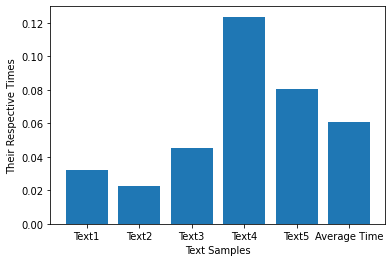

In [21]:
plt.bar(labels,times_d)
plt.xlabel("Text Samples")
plt.ylabel("Their Respective Times")
plt.show()

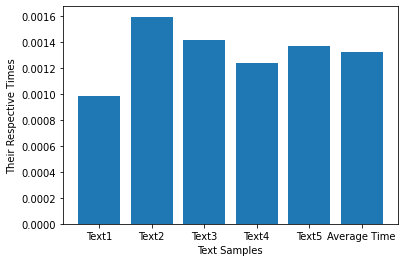

In [22]:
plt.bar(labels,times_g)
plt.xlabel("Text Samples")
plt.ylabel("Their Respective Times")
plt.show()

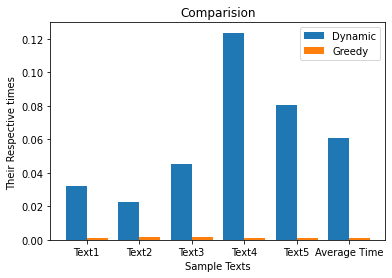

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
  
labels=["Text1","Text2","Text3","Text4","Text5","Average Time"]
times_d=[t1_d,t2_d,t3_d,t4_d,t5_d,avgtime_d]
times_g=[t1_g,t2_g,t3_g,t4_g,t5_g,avgtime_g]
  
X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, times_d, 0.4, label = 'Dynamic')
plt.bar(X_axis + 0.2, times_g, 0.4, label = 'Greedy')
  
plt.xticks(X_axis, labels)
plt.xlabel("Sample Texts")
plt.ylabel("Their Respective times ")
plt.title("Comparision")
plt.legend()
plt.show()

# GUI

In [24]:
from PyQt5 import QtCore, QtGui, QtWidgets
from random import Random




class DynamicProgramming(object):
    def __init__(self, width):
        self.width = width

    def TightPack(self, words):
        
        return ' '.join(words)

    def TextBadness(self, i, j):
        length = len(self.TightPack(self.words[i:j])) 
        if length > self.width:
            return float('inf')
        else:
            return (self.width - length) ** 3.0
    def expanded(self, words, width):
        if len(words) == 1:
            return words[0]
        Unspaced_words = ''.join(words)
        length = len(Unspaced_words)
        space_left = width - length
        gaps = [0 for _ in range(len(words) - 1)]
        while space_left:
            for idx, gap in enumerate(gaps):
                if not space_left:
                    break
                gaps[idx] += 1
                space_left -= 1
        Random(Unspaced_words).shuffle(gaps)
        gaps.append(0)  
        spaces = (gap * ' ' for gap in gaps)
        return ''.join(word + space for word, space in zip(words, spaces))

    def Best_Split(self, i, j):
        try:
            return self._message[(i, j)]
        except KeyError:
            pass
        if j == len(self.words):
            length = len(self.TightPack(self.words[i:j]))
            if length <= self.width:
                
                self._message[(i, j)] = 0
                self._impo[i] = j
                return 0
       
        vals = []
        for n in reversed(range(i, j)):
            total_TextBadness = self.TextBadness(i, n + 1) + self.Best_Split(n + 1, j)
            vals.append((total_TextBadness, n + 1))
       
        best_val, best_idx = min(vals, key=lambda pair: pair[0])
        self._message[(i, j)] = best_val
        self._impo[i] = best_idx
        return best_val

    def Combined_Lines(self):
        a = 0
        b = self._impo[0]
        while True:
            words = self.words[a:b]
            if b == len(self.words):
                # this is the last line, so
                # we don't justify the text
                yield self.TightPack(words)
                return
            yield self.expanded(words, self.width)
            a = b
            b = self._impo[a]
    def format(self, text):
        self._message = {}
        self._impo = {}
        self.words = text.split()
        self.Best_Split(0, len(self.words))
        return '\n'.join(self.Combined_Lines())


class GreedyApproach(DynamicProgramming):
    def format(self, text):
        self._message = {}
        self._impo = {}
        self.words = text.split()
        self.lines = []
        Current_Line = []
        for word in self.words:
            tmp = Current_Line + [word]
            if len(self.TightPack(tmp)) <= self.width:
                Current_Line += [word]
            else:
                self.lines.append(Current_Line)
                Current_Line = [word]
        if Current_Line:
            self.lines.append(Current_Line)
        return '\n'.join(self.Combined_Lines())

    def Combined_Lines(self):
        last = len(self.lines) - 1
        for idx, words in enumerate(self.lines):
            if idx == last:
                yield self.TightPack(words)
                return
            yield self.expanded(words, self.width)




class Ui_Dialog(object):
    def setupUi(self, Dialog):
        Dialog.setObjectName("Dialog")
        Dialog.resize(1338, 959)
        Dialog.setMinimumSize(QtCore.QSize(15, 15))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(14)
        Dialog.setFont(font)
        Dialog.setStyleSheet("background-color: qlineargradient(spread:pad, x1:0, y1:0, x2:1, y2:1, stop:0 rgba(42, 44, 111, 255), stop:0.533156 rgba(28, 29, 73, 255));\n"
                             "border-radius: 10px;")
        self.label = QtWidgets.QLabel(Dialog)
        self.label.setGeometry(QtCore.QRect(40, 40, 191, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.label.setFont(font)
        self.label.setStyleSheet("background-color: none;\n"
                                 "color: rgb(60, 231, 195);")
        self.label.setObjectName("label")
        self.MainInput = QtWidgets.QLineEdit(Dialog)
        self.MainInput.setGeometry(QtCore.QRect(40, 90, 1041, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(15)
        font.setBold(True)
        font.setWeight(75)
        self.MainInput.setFont(font)
        self.MainInput.setStyleSheet("background-color: rgb(255, 255, 127);")
        self.MainInput.setAlignment(
            QtCore.Qt.AlignLeading | QtCore.Qt.AlignLeft | QtCore.Qt.AlignVCenter)
        self.MainInput.setObjectName("MainInput")
        self.label_2 = QtWidgets.QLabel(Dialog)
        self.label_2.setGeometry(QtCore.QRect(40, 143, 311, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.label_2.setFont(font)
        self.label_2.setStyleSheet("background-color: none;\n"
                                   "color: rgb(60, 231, 195);")
        self.label_2.setObjectName("label_2")
        self.Width = QtWidgets.QSpinBox(Dialog)
        self.Width.setGeometry(QtCore.QRect(420, 140, 61, 41))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.Width.setFont(font)
        self.Width.setStyleSheet("QSpinBox{\n"
                                 "    border: none;\n"
                                 "    border-radius: 8px;\n"
                                 "    background-color: rgb(85, 255, 127);\n"
                                 "}")
        self.Width.setObjectName("Width")
        self.ConvertButton = QtWidgets.QPushButton(
            Dialog, clicked=lambda: self.convert())
        self.ConvertButton.setGeometry(QtCore.QRect(330, 210, 141, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(14)
        font.setBold(True)
        font.setWeight(75)
        self.ConvertButton.setFont(font)
        self.ConvertButton.setStyleSheet("QPushButton{\n"
                                         "    border: none;\n"
                                         "    border-radius: 8px;\n"
                                         "    background-color: rgb(85, 255, 127);\n"
                                         "}\n"
                                         "QPushButton:hover{    \n"
                                         "    background-color: rgba(85, 255, 127, 150);\n"
                                         "}")
        self.ConvertButton.setObjectName("ConvertButton")
        self.label_4 = QtWidgets.QLabel(Dialog)
        self.label_4.setGeometry(QtCore.QRect(360, 250, 91, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(14)
        font.setBold(True)
        font.setWeight(75)
        self.label_4.setFont(font)
        self.label_4.setStyleSheet("background-color: none;\n"
                                   "color: rgb(60, 231, 195);")
        self.label_4.setObjectName("label_4")
        self.label_5 = QtWidgets.QLabel(Dialog)
        self.label_5.setGeometry(QtCore.QRect(850, 230, 411, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.label_5.setFont(font)
        self.label_5.setStyleSheet("background-color: none;\n"
                                   "color: rgb(60, 231, 195);")
        self.label_5.setObjectName("label_5")
        self.FontNumberInput = QtWidgets.QSpinBox(Dialog)
        self.FontNumberInput.setGeometry(QtCore.QRect(1160, 290, 61, 41))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(14)
        font.setBold(True)
        font.setWeight(75)
        self.FontNumberInput.setFont(font)
        self.FontNumberInput.setStyleSheet("QSpinBox{\n"
                                           "    border: none;\n"
                                           "    border-radius: 8px;\n"
                                           "    background-color: rgb(85, 255, 127);\n"
                                           "}")
        self.FontNumberInput.setObjectName("FontNumberInput")
        self.label_6 = QtWidgets.QLabel(Dialog)
        self.label_6.setGeometry(QtCore.QRect(910, 460, 321, 51))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.label_6.setFont(font)
        self.label_6.setStyleSheet("background-color: none;\n"
                                   "color: rgb(60, 231, 195);")
        self.label_6.setObjectName("label_6")
        self.SearchButton = QtWidgets.QPushButton(
            Dialog, clicked=lambda: self.searchitButton())
        self.SearchButton.setGeometry(QtCore.QRect(1120, 530, 91, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.SearchButton.setFont(font)
        self.SearchButton.setStyleSheet("QPushButton{\n"
                                        "    border: none;\n"
                                        "    border-radius: 8px;\n"
                                        "    background-color: rgb(85, 255, 127);\n"
                                        "}\n"
                                        "QPushButton:hover{    \n"
                                        "    background-color: rgba(85, 255, 127, 150);\n"
                                        "}")
        self.SearchButton.setObjectName("SearchButton")
        self.SearchInput = QtWidgets.QLineEdit(Dialog)
        self.SearchInput.setGeometry(QtCore.QRect(910, 530, 161, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(15)
        font.setBold(True)
        font.setWeight(75)
        self.SearchInput.setFont(font)
        self.SearchInput.setStyleSheet("background-color: rgb(229, 226, 116);")
        self.SearchInput.setAlignment(
            QtCore.Qt.AlignLeading | QtCore.Qt.AlignLeft | QtCore.Qt.AlignVCenter)
        self.SearchInput.setObjectName("SearchInput")
        self.SearchOutput = QtWidgets.QLabel(Dialog)
        self.SearchOutput.setGeometry(QtCore.QRect(880, 610, 371, 61))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(14)
        self.SearchOutput.setFont(font)
        self.SearchOutput.setStyleSheet(
            "background-color: rgb(229, 226, 116);")
        self.SearchOutput.setFrameShape(QtWidgets.QFrame.WinPanel)
        self.SearchOutput.setText("")
        self.SearchOutput.setAlignment(
            QtCore.Qt.AlignLeading | QtCore.Qt.AlignLeft | QtCore.Qt.AlignVCenter)
        self.SearchOutput.setObjectName("SearchOutput")
        self.MainOutput = QtWidgets.QLabel(Dialog)
        self.MainOutput.setGeometry(QtCore.QRect(10, 290, 771, 661))
        font = QtGui.QFont()
        font.setPointSize(15)
        self.MainOutput.setFont(font)
        self.MainOutput.setStyleSheet("background-color: rgb(255, 255, 127);")
        self.MainOutput.setText("")
        self.MainOutput.setAlignment(
            QtCore.Qt.AlignLeading | QtCore.Qt.AlignLeft | QtCore.Qt.AlignTop)
        self.MainOutput.setObjectName("MainOutput")
        self.label_3 = QtWidgets.QLabel(Dialog)
        self.label_3.setGeometry(QtCore.QRect(820, 790, 511, 131))
        self.label_3.setStyleSheet("background: none;")
        self.label_3.setText("")
        self.label_3.setPixmap(QtGui.QPixmap(
            "../../Downloads/amrita_Green500px.png"))
        self.label_3.setObjectName("label_3")
        self.Amrita = QtWidgets.QLabel(Dialog)
        self.Amrita.setGeometry(QtCore.QRect(830, 800, 511, 121))
        self.Amrita.setStyleSheet("background-color:none;")
        self.Amrita.setText("")
        self.Amrita.setPixmap(QtGui.QPixmap("amrita_Green500px.png"))
        self.Amrita.setObjectName("Amrita")
        self.ChangeFontButton = QtWidgets.QPushButton(
            Dialog, clicked=lambda: self.fontoptions())
        self.ChangeFontButton.setGeometry(QtCore.QRect(980, 370, 161, 31))
        font = QtGui.QFont()
        font.setFamily("Calibri")
        font.setPointSize(16)
        font.setBold(True)
        font.setWeight(75)
        self.ChangeFontButton.setFont(font)
        self.ChangeFontButton.setStyleSheet("QPushButton{\n"
                                            "    border: none;\n"
                                            "    border-radius: 8px;\n"
                                            "    background-color: rgb(85, 255, 127);\n"
                                            "}\n"
                                            "QPushButton:hover{    \n"
                                            "    background-color: rgba(85, 255, 127, 150);\n"
                                            "}")
        self.ChangeFontButton.setObjectName("ChangeFontButton")
        self.FontStyleInput = QtWidgets.QComboBox(Dialog)
        self.FontStyleInput.setGeometry(QtCore.QRect(900, 290, 201, 31))
        self.FontStyleInput.setStyleSheet("background-color: rgb(255, 255, 127);\n"
                                          "")
        self.FontStyleInput.setObjectName("FontStyleInput")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")
        self.FontStyleInput.addItem("")

        self.retranslateUi(Dialog)
        QtCore.QMetaObject.connectSlotsByName(Dialog)

    def convert(self):
        resultfinal = GreedyApproach(
            self.Width.value()).format(self.MainInput.text())
        self.MainOutput.setText(resultfinal)
        print(resultfinal)

    def searchitButton(self):
        searchIndex = ((self.MainInput.text()).lower()).find(
            (self.SearchInput.text()).lower())
        if searchIndex >= 0:
            self.SearchOutput.setText(
                f"Word found at Index: {str(searchIndex)}")
        else:
            self.SearchOutput.setText("Word not found ")

    def fontoptions(self):
        newfontstyle = self.FontStyleInput.currentText()
        newfontsize = self.FontNumberInput.value()
        self.MainOutput.setFont(QtGui.QFont(newfontstyle, newfontsize))

    def retranslateUi(self, Dialog):
        _translate = QtCore.QCoreApplication.translate
        Dialog.setWindowTitle(_translate("Dialog", "Paragraph Maker"))
        self.label.setText(_translate("Dialog", "Enter the Input Text"))
        self.label_2.setText(_translate(
            "Dialog", "Enter the Width of the Paragraph"))
        self.Width.setToolTip(_translate(
            "Dialog", "<html><head/><body><p><span style=\" color:#ffffff;\">Width</span></p></body></html>"))
        self.ConvertButton.setToolTip(_translate(
            "Dialog", "<html><head/><body><p align=\"center\"><span style=\" color:#ffffff;\">Convert the text to Paragraph</span></p></body></html>"))
        self.ConvertButton.setText(_translate("Dialog", "C O N V E R T"))
        self.label_4.setText(_translate("Dialog", " Paragraph"))
        self.label_5.setText(_translate(
            "Dialog", "Select the font size and style for the paragraph"))
        self.FontNumberInput.setToolTip(_translate(
            "Dialog", "<html><head/><body><p><span style=\" color:#ffffff;\">Font Size</span></p></body></html>"))
        self.label_6.setText(_translate(
            "Dialog", "Search for a word in the Paragraph"))
        self.SearchButton.setToolTip(_translate(
            "Dialog", "<html><head/><body><p><span style=\" color:#ffffff;\">Search for a word</span></p></body></html>"))
        self.SearchButton.setText(_translate("Dialog", "Search"))
        self.SearchInput.setToolTip(_translate(
            "Dialog", "<html><head/><body><p><span style=\" color:#0000ff;\">Enter a word</span></p></body></html>"))
        self.MainOutput.setToolTip(_translate(
            "Dialog", "<html><head/><body><p><span style=\" color:#ffffff;\">Paragraph</span></p></body></html>"))
        self.ChangeFontButton.setText(_translate("Dialog", "Change Font"))
        self.FontStyleInput.setItemText(0, _translate("Dialog", "Times"))
        self.FontStyleInput.setItemText(
            1, _translate("Dialog", "Bookman Old Style"))
        self.FontStyleInput.setItemText(2, _translate("Dialog", "Chiller"))
        self.FontStyleInput.setItemText(3, _translate("Dialog", "Raleway"))
        self.FontStyleInput.setItemText(4, _translate("Dialog", "Garamond"))
        self.FontStyleInput.setItemText(
            5, _translate("Dialog", "Palatino Linotype"))
        self.FontStyleInput.setItemText(6, _translate("Dialog", "Verdana"))
        self.FontStyleInput.setItemText(
            7, _translate("Dialog", "Segoe MDL2 Assets"))
        self.FontStyleInput.setItemText(8, _translate("Dialog", "Forte"))
        self.FontStyleInput.setItemText(9, _translate("Dialog", "Candara"))
        self.FontStyleInput.setItemText(10, _translate("Dialog", "Bodoni MT"))
        self.FontStyleInput.setItemText(11, _translate("Dialog", "Calibri"))
        self.FontStyleInput.setItemText(12, _translate("Dialog", "Tahoma"))


if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    Dialog = QtWidgets.QDialog()
    ui = Ui_Dialog()
    ui.setupUi(Dialog)
    Dialog.show()
    sys.exit(app.exec_())

Virtual contest is a way to take part in
past contest,  as  close as  possible to
participation  on  time. It is supported
only ICPC  mode for virtual contests. If
you've  seen  these problems,  a virtual
contest is not  for  you  -  solve these
problems in  the  archive. If  you  just
want   to  solve  some  problem  from  a
contest, a  virtual  contest is  not for
you - solve this problem in the archive.
Never use someone else's  code, read the
tutorials  or  communicate   with  other
person during  a  virtual contest. Given
the integer n — the  number of available
blocks. You must use all blocks to build
a pedestal.  The pedestal consists of  3
platforms for 2-nd, 1-st and 3-rd places
respectively.  The platform for the 1-st
place must be  strictly  higher than for
the 2-nd place, and the platform for the
2-nd place must  be strictly higher than
for the 3-rd place. Also,  the height of
each  platform must be greater than zero
(that  is, each platform must contain at
least one block)

SystemExit: 0

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
